EM Shower Image Dataset - https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/pvn3xc3wy5-1.zip

In [12]:
import h5py
import numpy as np

In [2]:
!ls /fast_scratch/QVAE

data  run_jupyter_scripts


In [3]:
ef = h5py.File('/fast_scratch/QVAE/data/calo/eplus.hdf5','r')
gf = h5py.File('/fast_scratch/QVAE/data/calo/gamma.hdf5','r')
pf = h5py.File('/fast_scratch/QVAE/data/calo/piplus.hdf5','r')

In [4]:
list(ef.keys())

['energy', 'layer_0', 'layer_1', 'layer_2', 'overflow']

In [5]:
for key in ef.keys():
    print(key, ef[key].shape, ef[key].dtype)

energy (100000, 1) float64
layer_0 (100000, 3, 96) float64
layer_1 (100000, 12, 12) float64
layer_2 (100000, 12, 6) float64
overflow (100000, 3) float64


In [17]:
print(np.array(pf['overflow'][:100]))

[[0.00000000e+00 6.03353616e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.51414845e-01 1.36680971e+01 2.46460259e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.29879056e-01 1.62568872e+01 8.58583534e+00]
 [8.86892429e+00 5.99974981e+01 2.54668928e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.79985231e+00 2.34856127e+01 6.49506975e-01]
 [8.82588379e-01 3.00081932e+02 1.11315437e+01]
 [2.25106573e+01 6.60341219e+02 6.50412774e+01]
 [3.00314179e+01 3.36843321e+02 3.46895024e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.29287908e+00 6.35583015e+01 1.68129971e+01]
 [8.89275492e+01 3.04530592e+02 3.35658612e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.90894473e+01 2.42003479e+02 6.18340034e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.15350819e+01 7.66758960e+02 3.76494874e+01]
 [1.23596222e+01 5.17361648e+02 1.81544684e+01]
 [6.02217120e+00 1.92294422e+02 1.70237594e+02]
 [0.00000000e+00 0.00000000e+00 0.000000

Plots

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import random
import numpy as np
import re

Event displays

In [7]:
normList = [LogNorm(vmax=10000, vmin=0.1), LogNorm(vmax=10000, vmin=0.1), LogNorm(vmax=10, vmin=0.1)]
        
def eventDisp(hdf, num_events, save_path):
    keys = list(hdf.keys())
    ptype = str(re.search('QVAE/(.+?).hdf5', hdf.filename).group(1))
    
    for num_event in range(num_events):
        eid = random.randrange(hdf[keys[0]].shape[0])
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(120, 40))
        
        # Default - plt.subplots_adjust(left=0.125, bottom=0.9, right=0.1, top=0.9, wspace=0.2, hspace=0.2)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
        
        for i, axe in enumerate(fig.axes):
            im = axe.imshow(np.array(hdf[keys[i+1]][eid]), aspect='auto', origin='upper', norm=normList[i])
            axe.set_title('Layer ' + str(i), fontsize=100)
            axe.tick_params(labelsize=100)
            axe.set_yticks(np.arange(0, hdf[keys[i+1]][eid].shape[0], 1))
            axe.set_xlabel(r'$\phi$ Cell ID', fontsize=100)
            axe.set_ylabel(r'$\eta$ Cell ID', fontsize=100)
            
            if i == 0:
                axe.set_xticks(np.arange(0, hdf[keys[i+1]][eid].shape[1], 10))
            else:
                axe.set_xticks(np.arange(0, hdf[keys[i+1]][eid].shape[1], 1))

            cbar = fig.colorbar(im, ax=axe)
            cbar.set_label('Energy, (MeV)', fontsize=100)
            cbar.ax.tick_params(labelsize=100)
            
        fig.suptitle(ptype + ', ' + str(round(hdf[keys[0]][eid][0], 2)) + ' GeV', fontsize=150)
    
        if save_path is not None:
            plt.savefig(save_path + ptype + str(int(hdf[keys[0]][eid][0])) + '.png', format='png', dpi=50)
            plt.close()
        else:
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'figs/data/calo/eplus52.png'

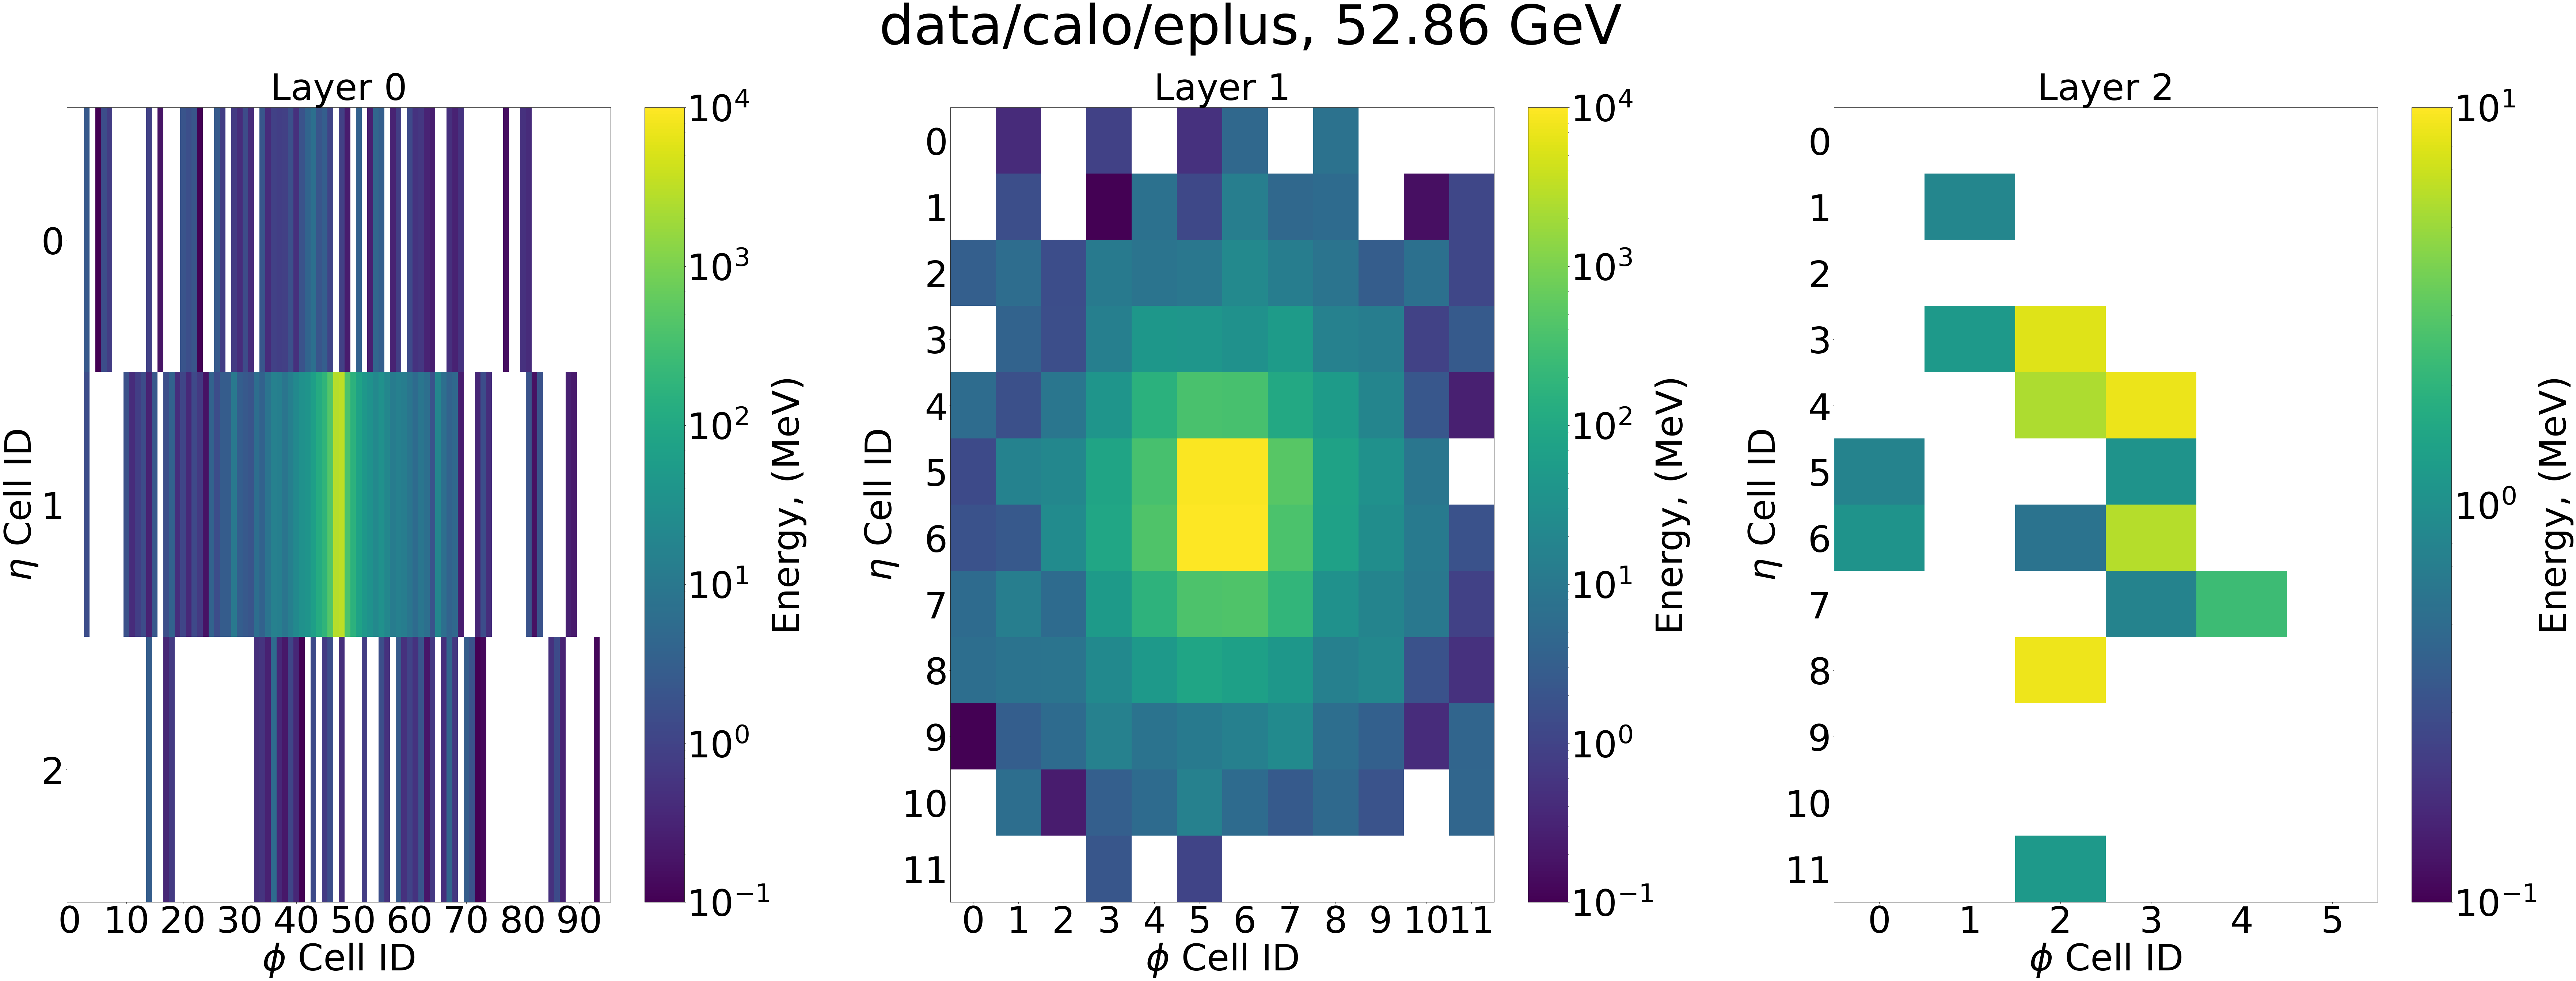

In [14]:
# Generate event displays
eventDisp(ef, 20, 'figs/')
eventDisp(gf, 20, 'figs/')
eventDisp(pf, 20, 'figs/')

In [35]:
!tar czf event_disps.tar.gz figs/*.png

Energy spectra and energy depositions per layer

Text(0.5, 0.98, 'Energy spectrum per particle type (Generated)')

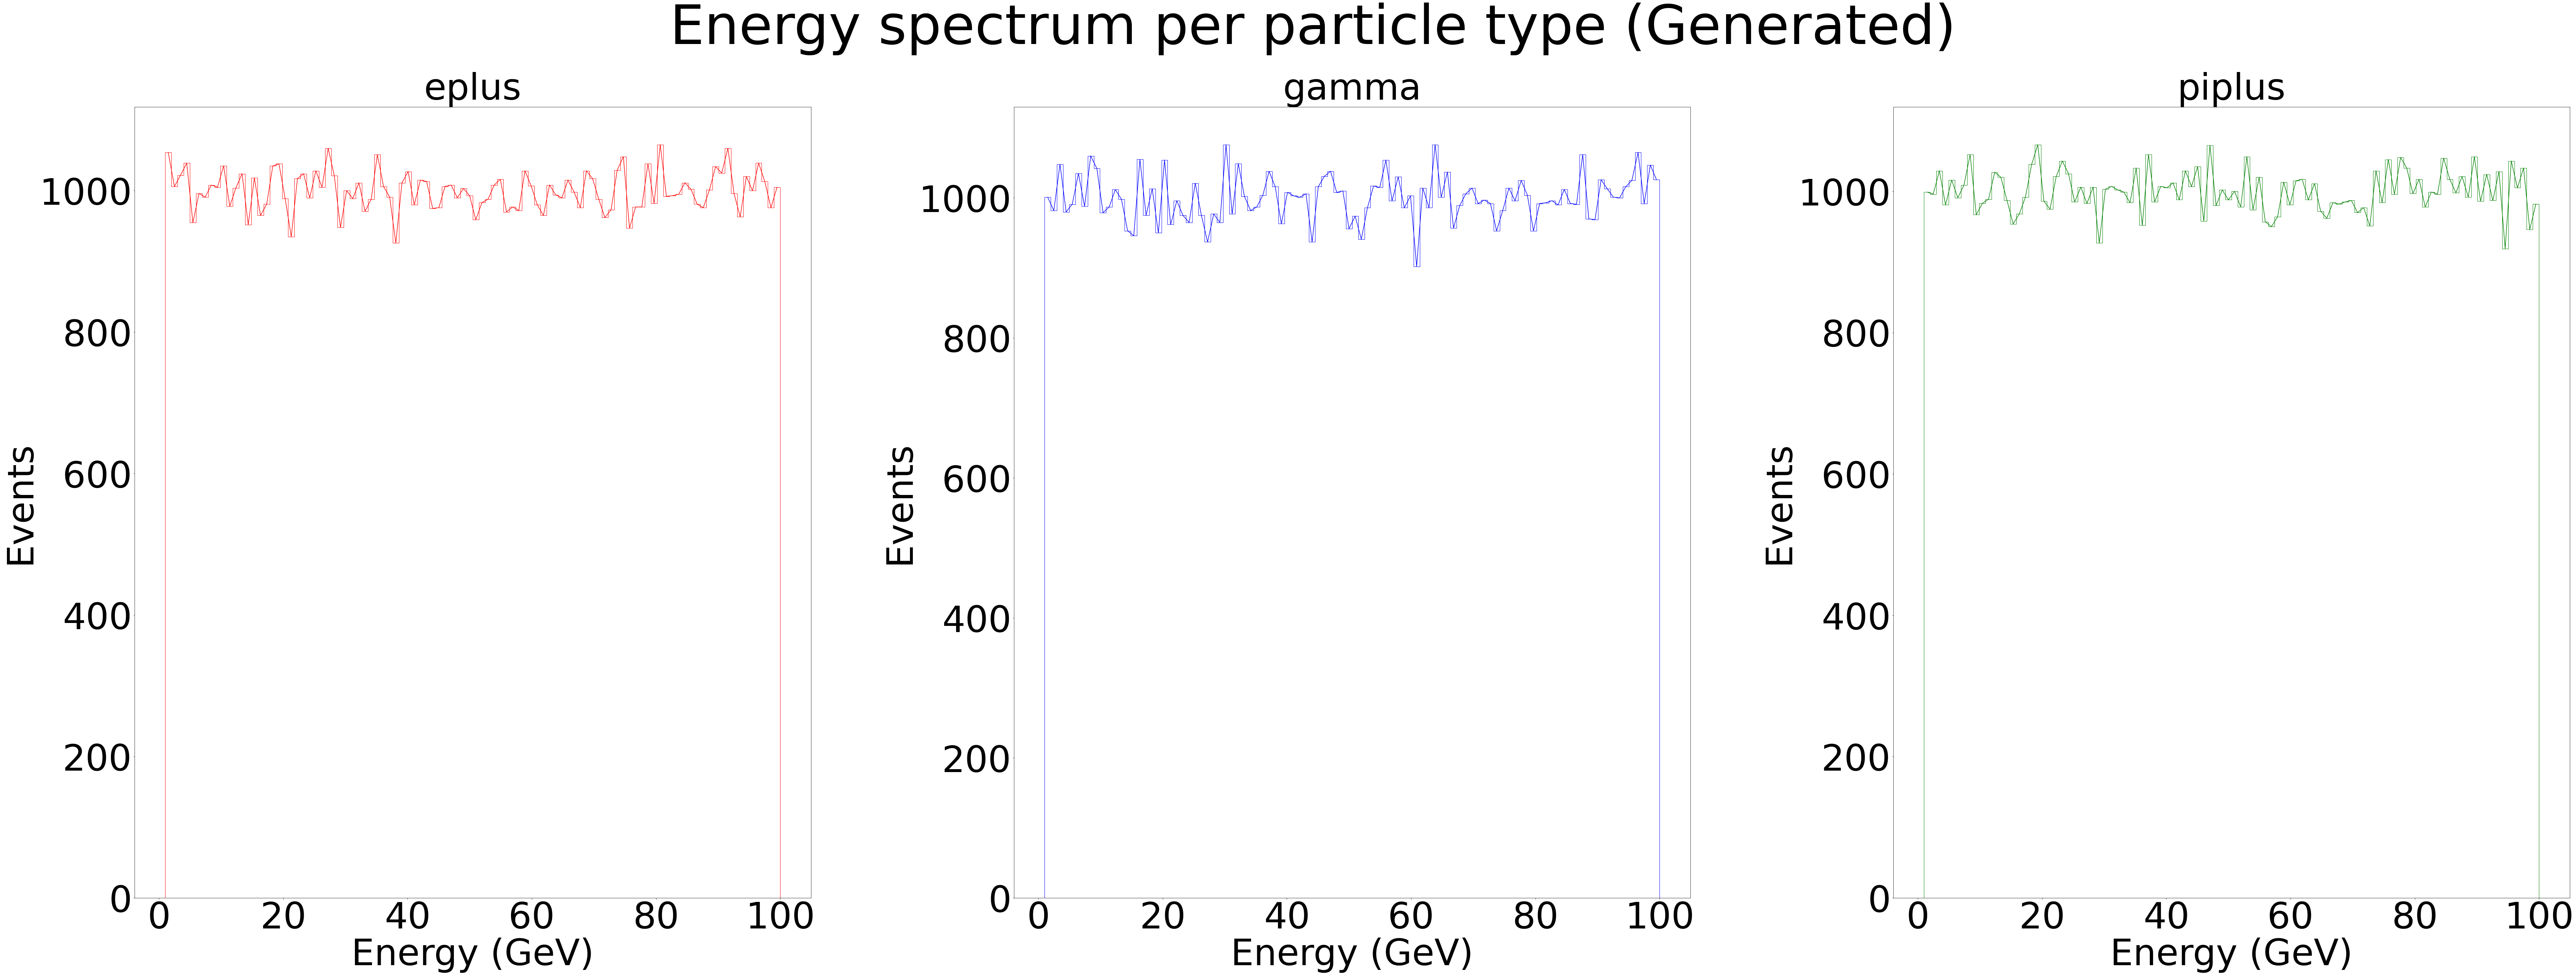

In [7]:
hdfs = [ef, gf, pf]
ptypes = ['eplus', 'gamma', 'piplus']
colors = ['red','blue', 'green']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(120, 40))
# Default - plt.subplots_adjust(left=0.125, bottom=0.9, right=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
    
for i, hdf in enumerate(hdfs):
    vals, bins,_ = ax[i].hist(np.array(hdf['energy']).reshape(-1), bins = 100, histtype='step', density=False, color=colors[i])
    binc = 0.5*(bins[1:]+bins[:-1])
    ax[i].plot(binc, vals, color=colors[i])
    ax[i].tick_params(labelsize=100)
    ax[i].set_xlabel('Energy (GeV)', fontsize=100)
    ax[i].set_ylabel('Events', fontsize=100)
    ax[i].set_title(ptypes[i], fontsize=100)
    
fig.suptitle('Energy spectrum per particle type (Generated)', fontsize=150)

Text(0.5, 0.98, 'Energy spectrum per particle type (Observed)')

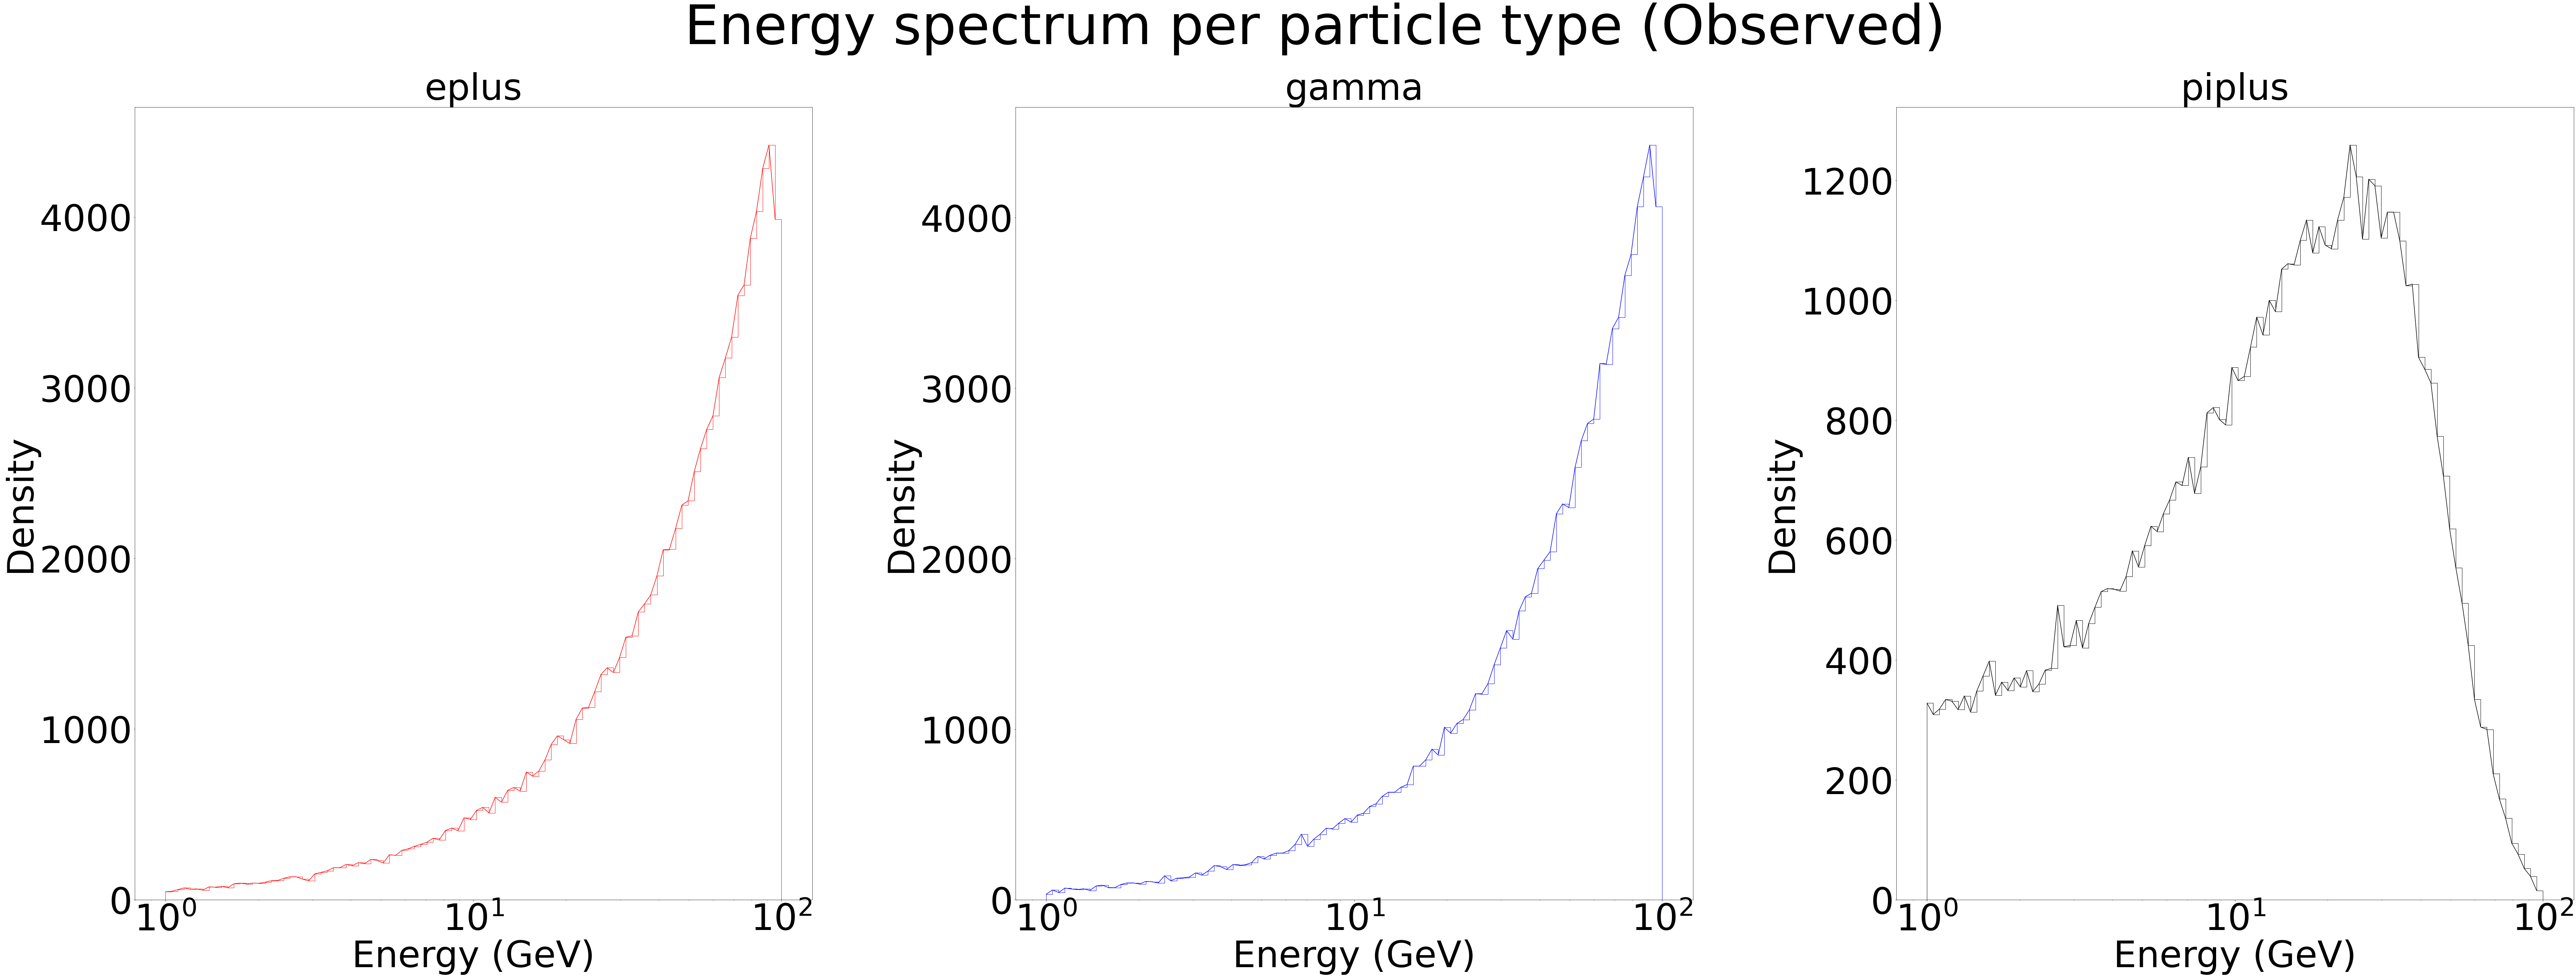

In [23]:
import matplotlib.ticker as tkr 

hdfs = [ef, gf, pf]
ptypes = ['eplus', 'gamma', 'piplus']
colors = ['red', 'blue', 'black']

def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{}'.format(int(x / 1000))
    return s

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(120, 40))
# Default - plt.subplots_adjust(left=0.125, bottom=0.9, right=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
xfmt = tkr.FuncFormatter(numfmt)
    
for i, hdf in enumerate(hdfs):
    npl0 = np.array(hdf['layer_0'])
    npl1 = np.array(hdf['layer_1'])
    npl2 = np.array(hdf['layer_2'])
    
    npl0 = npl0.reshape(npl0.shape[0], -1).sum(axis=1)
    npl1 = npl1.reshape(npl1.shape[0], -1).sum(axis=1)
    npl2 = npl2.reshape(npl2.shape[0], -1).sum(axis=1)
    
    nplsum = np.sum([npl0, npl1, npl2], axis=0)/1000.
    logbins = np.logspace(np.log10(1), np.log10(100), 100)
    vals, bins, _ = ax[i].hist(nplsum, bins=logbins, histtype='step', density=False, color=colors[i])
    ax[i].plot(bins[:99], vals, color=colors[i])
    
    ax[i].tick_params(labelsize=100)
    ax[i].set_xlabel('Energy (GeV)', fontsize=100)
    ax[i].set_ylabel('Density', fontsize=100)
    ax[i].set_title(ptypes[i], fontsize=100)
    ax[i].set_xscale("log")
    
fig.suptitle('Energy spectrum per particle type (Observed)', fontsize=150)

Text(0.5, 0.98, 'Energy spectrum per layer (Observed)')

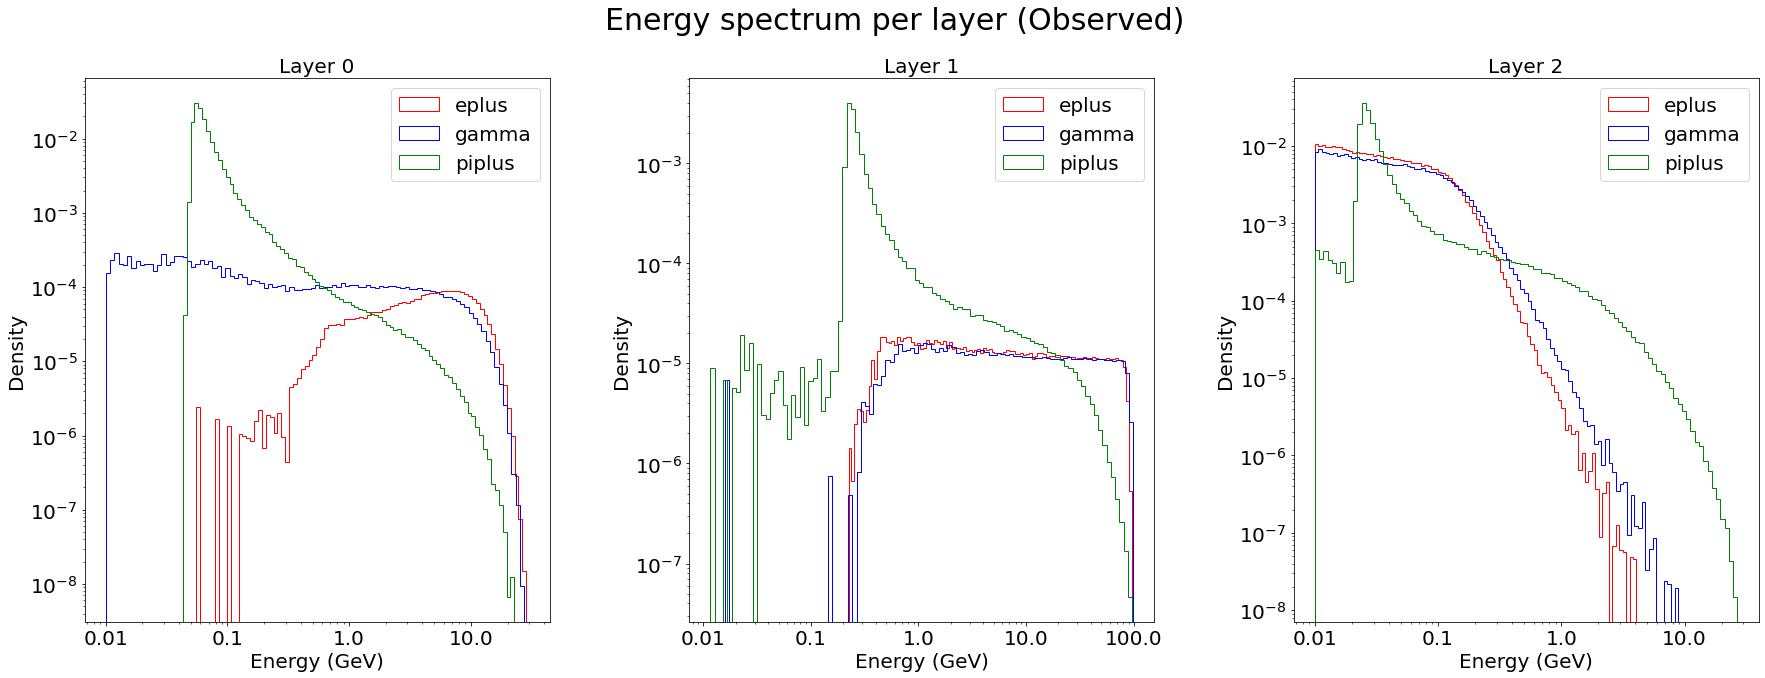

In [68]:
import matplotlib.ticker as tkr 

hdfs = [ef, gf, pf]
ptypes = ['eplus', 'gamma', 'piplus']
colors = ['red', 'blue', 'green']

def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{}'.format(x / 1000)
    return s
    
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
# Default - plt.subplots_adjust(left=0.125, bottom=0.9, right=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
xfmt = tkr.FuncFormatter(numfmt)

for i, layer in enumerate(['layer_0', 'layer_1', 'layer_2']):
    for j, hdf in enumerate(hdfs):
        npl = np.array(hdf[layer])
        npl = npl.reshape(npl.shape[0], -1).sum(axis=1)
            
        logbins = np.logspace(np.log10(max(10, np.amin(npl))), np.log10(np.amax(npl)), 100)
        vals, bins, _ = ax[i].hist(npl, bins=logbins, density=True, color=colors[j], log=True, label=ptypes[j], histtype='step')

        ax[i].tick_params(labelsize=20)
        ax[i].set_xlabel('Energy (GeV)', fontsize=20)
        ax[i].set_ylabel('Density', fontsize=20)
        ax[i].set_yscale('log')
        ax[i].set_xscale('log')
        
        ax[i].xaxis.set_major_formatter(xfmt)
        ax[i].set_title('Layer ' + str(i), fontsize=20)
        ax[i].legend(loc="upper right", prop={"size":20})
        
fig.suptitle('Energy spectrum per layer (Observed)', fontsize=30)

In [15]:
nplsumdict = {}
for i, hdf in enumerate(hdfs):
    npl0 = np.array(hdf['layer_0'])
    npl1 = np.array(hdf['layer_1'])
    npl2 = np.array(hdf['layer_2'])
    
    npl0 = npl0.reshape(npl0.shape[0], -1).sum(axis=1)
    npl1 = npl1.reshape(npl1.shape[0], -1).sum(axis=1)
    npl2 = npl2.reshape(npl2.shape[0], -1).sum(axis=1)
    
    nplsum = np.sum([npl0, npl1, npl2], axis=0)
    nplsumdict[hdf.filename] = nplsum

In [70]:
print(nplsumdict.keys())

dict_keys(['/fast_scratch/QVAE/eplus.hdf5', '/fast_scratch/QVAE/gamma.hdf5', '/fast_scratch/QVAE/piplus.hdf5'])


In [71]:
nplsumdict['/fast_scratch/QVAE/eplus.hdf5'].shape

(100000,)

Text(0.5, 0.98, 'Fraction of total energy per layer (Observed)')

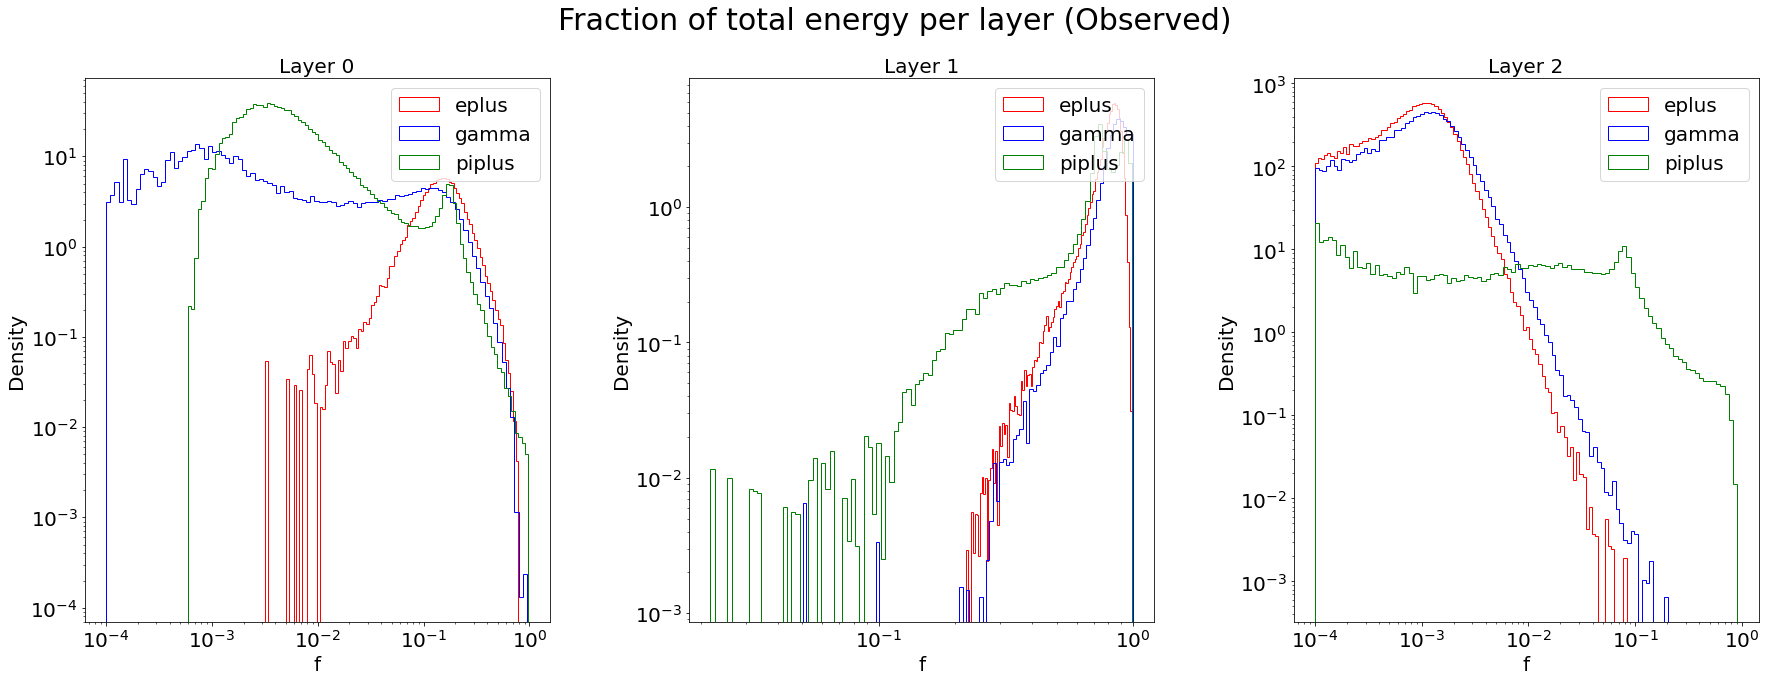

In [77]:
import matplotlib.ticker as tkr 

hdfs = [ef, gf, pf]
ptypes = ['eplus', 'gamma', 'piplus']
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

for i, layer in enumerate(['layer_0', 'layer_1', 'layer_2']):
    for j, hdf in enumerate(hdfs):
        npl = np.array(hdf[layer])
        npl = npl.reshape(npl.shape[0], -1).sum(axis=1)
        lfrac = np.divide(npl, nplsumdict[hdf.filename])
         
        logbins = np.logspace(np.log10(max(1e-4, np.amin(lfrac))), np.log10(np.amax(lfrac)), 100)
        vals, bins,_ = ax[i].hist(lfrac, bins=logbins, histtype='step', density=True, color=colors[j], log=True, label=ptypes[j])

        ax[i].tick_params(labelsize=20)
        ax[i].set_xlabel('f', fontsize=20)
        ax[i].set_ylabel('Density', fontsize=20)
        ax[i].set_yscale('log')
        ax[i].set_xscale('log')
        
        ax[i].set_title('Layer ' + str(i), fontsize=20)
        ax[i].legend(loc="upper right", prop={"size":20})
        
fig.suptitle('Fraction of total energy per layer (Observed)', fontsize=30)

In [10]:
nplsumdictl = {}
for i, hdf in enumerate(hdfs):
    npl0 = np.array(hdf['layer_0'])
    npl1 = np.array(hdf['layer_1'])
    npl2 = np.array(hdf['layer_2'])
    
    npl0 = npl0.reshape(npl0.shape[0], -1).sum(axis=1)
    npl1 = npl1.reshape(npl1.shape[0], -1).sum(axis=1)
    npl2 = npl2.reshape(npl2.shape[0], -1).sum(axis=1)
    
    nplsumdictl[hdf.filename] = [npl0, npl1, npl2]

In [11]:
list(nplsumdictl.keys())

['/fast_scratch/QVAE/eplus.hdf5',
 '/fast_scratch/QVAE/gamma.hdf5',
 '/fast_scratch/QVAE/piplus.hdf5']

In [12]:
nplsumdictl['/fast_scratch/QVAE/eplus.hdf5'][2].shape

(100000,)

Text(0.5, 0.98, 'Max depth per particle type (Observed)')

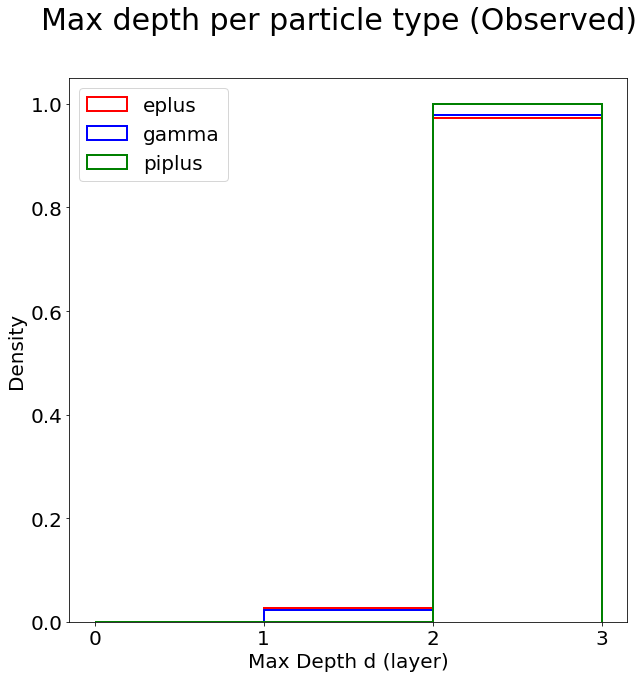

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
depth = {keys:[] for keys in nplsumdictl.keys()}

for i, hdfname in enumerate(nplsumdictl.keys()):
    for j in range(nplsumdictl[hdfname][0].shape[0]):
        if nplsumdictl[hdfname][2][j] > 0:
            depth[hdfname].append(2)
        elif nplsumdictl[hdfname][1][j] > 0:
            depth[hdfname].append(1)
        else:
            depth[hdfname].append(0)
    
    vals, bins, _ = ax.hist(depth[hdfname], bins=range(0, 4, 1), histtype='step', density=True, color=colors[i], label=ptypes[i], linewidth=2.0)
    ax.tick_params(labelsize=20)
    ax.set_xlabel('Max Depth d (layer)', fontsize=20)
    ax.set_ylabel('Density', fontsize=20)
    ax.legend(loc="upper left", prop={"size":20})
    ax.set_xticks(np.arange(4))
    
fig.suptitle('Max depth per particle type (Observed)', fontsize=30)

In [13]:
eratio = {}

for i, hdf in enumerate(hdfs):
    npl0 = np.array(hdf['layer_0'])
    npl1 = np.array(hdf['layer_1'])
    npl2 = np.array(hdf['layer_2'])
    
    npl0 = npl0.reshape(npl0.shape[0], -1)
    npl1 = npl1.reshape(npl1.shape[0], -1)
    npl2 = npl2.reshape(npl2.shape[0], -1)
    
    eratio[hdf.filename] = [np.nan_to_num((npl[:, -1] - npl[:, -2])/(npl[:, -1] + npl[:, -2])) for npl in [np.sort(npl0, axis=1), np.sort(npl1, axis=1), np.sort(npl2, axis=1)]]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Text(0.5, 0.98, '$E_{ratio, i}$ (Observed)')

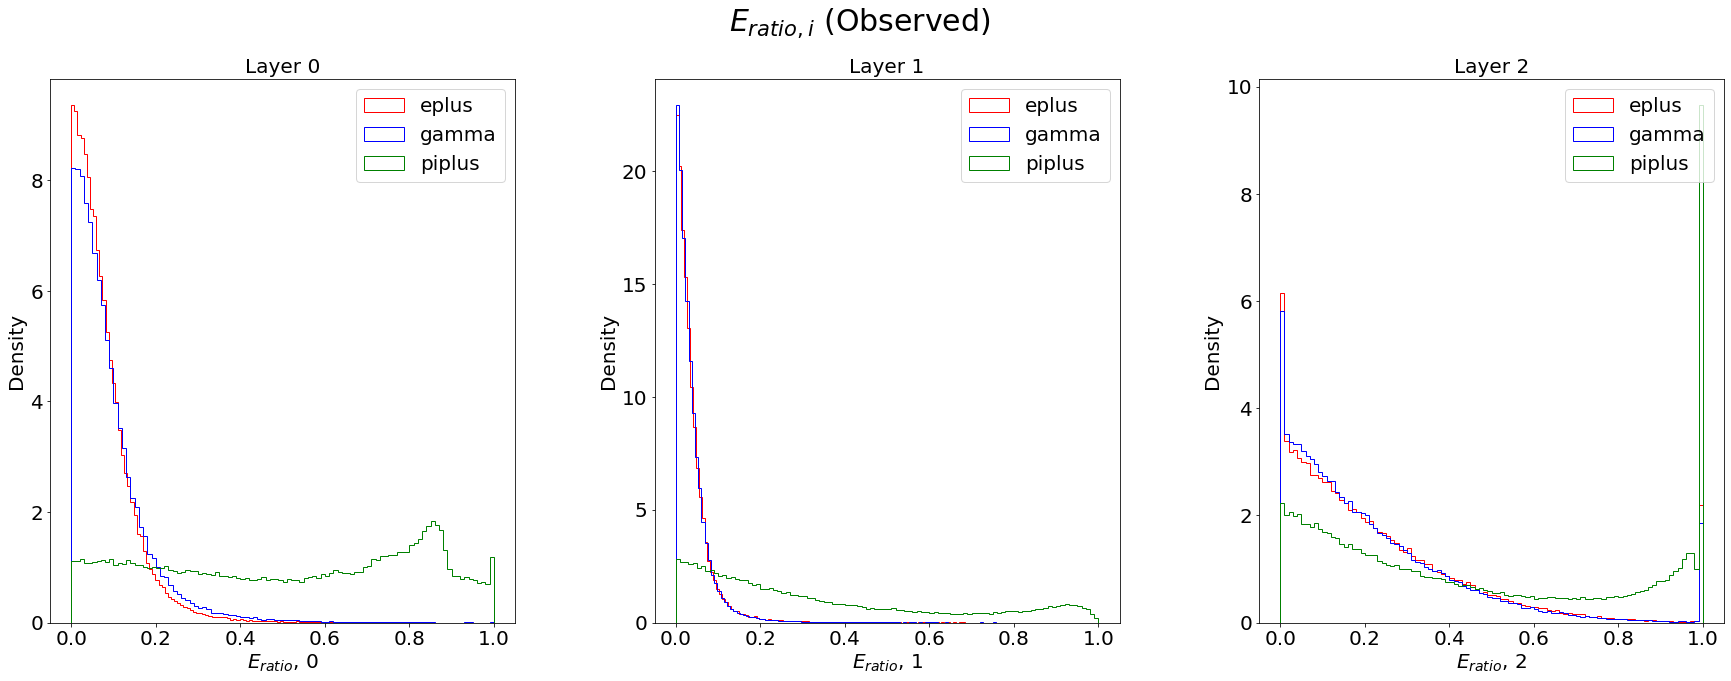

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

for i, layer in enumerate(['layer_0', 'layer_1', 'layer_2']):
    for j, hdf in enumerate(hdfs):
        eratiol = np.array(eratio[hdf.filename][i])
        vals, bins,_ = ax[i].hist(eratiol, bins=100, histtype='step', density=True, color=colors[j], label=ptypes[j])

        ax[i].tick_params(labelsize=20)
        ax[i].set_xlabel(r'$E_{ratio}$, ' + str(i), fontsize=20)
        ax[i].set_ylabel('Density', fontsize=20)

        ax[i].set_title('Layer ' + str(i), fontsize=20)
        ax[i].legend(loc="upper right", prop={"size":20})
        
fig.suptitle(r'$E_{ratio, i}$ (Observed)', fontsize=30)

In [30]:
sparsity = {}

for i, hdf in enumerate(hdfs):
    npl0 = np.array(hdf['layer_0'])
    npl1 = np.array(hdf['layer_1'])
    npl2 = np.array(hdf['layer_2'])
    
    npl0 = npl0.reshape(npl0.shape[0], -1)
    npl1 = npl1.reshape(npl1.shape[0], -1)
    npl2 = npl2.reshape(npl2.shape[0], -1)
    
    sparsity[hdf.filename] = [(np.count_nonzero(npl, axis=1)/npl.shape[1]) for npl in [npl0, npl1, npl2]]

Text(0.5, 0.98, 'Sparsity per layer (Observed)')

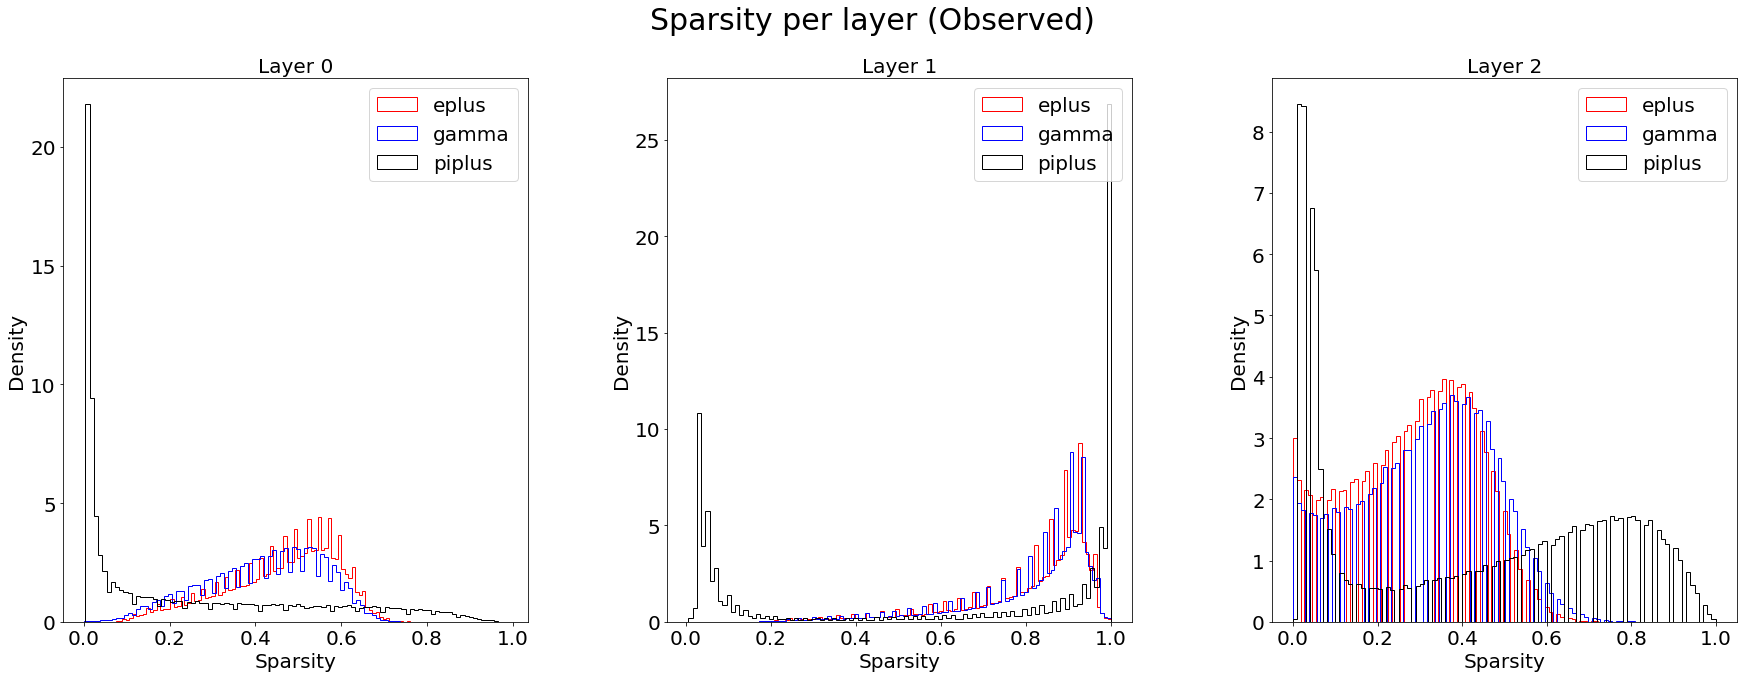

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

for i, layer in enumerate(['layer_0', 'layer_1', 'layer_2']):
    for j, hdf in enumerate(hdfs):
        sparsityl = np.array(sparsity[hdf.filename][i])
        vals, bins,_ = ax[i].hist(sparsityl, bins=100, histtype='step', density=True, color=colors[j], label=ptypes[j])

        ax[i].tick_params(labelsize=20)
        ax[i].set_xlabel('Sparsity', fontsize=20)
        ax[i].set_ylabel('Density', fontsize=20)

        ax[i].set_title('Layer ' + str(i), fontsize=20)
        ax[i].legend(loc="upper right", prop={"size":20})
        
fig.suptitle('Sparsity per layer (Observed)', fontsize=30)

In [35]:
sparsitytot = {}

for i, hdf in enumerate(hdfs):
    npl0 = np.array(hdf['layer_0'])
    npl1 = np.array(hdf['layer_1'])
    npl2 = np.array(hdf['layer_2'])
    
    npl0 = npl0.reshape(npl0.shape[0], -1)
    npl1 = npl1.reshape(npl1.shape[0], -1)
    npl2 = npl2.reshape(npl2.shape[0], -1)
    npl = np.concatenate([npl0, npl1, npl2], axis=1)
    
    sparsitytot[hdf.filename] = (np.count_nonzero(npl, axis=1)/npl.shape[1])

Text(0.5, 0.98, 'Total sparsity (Observed)')

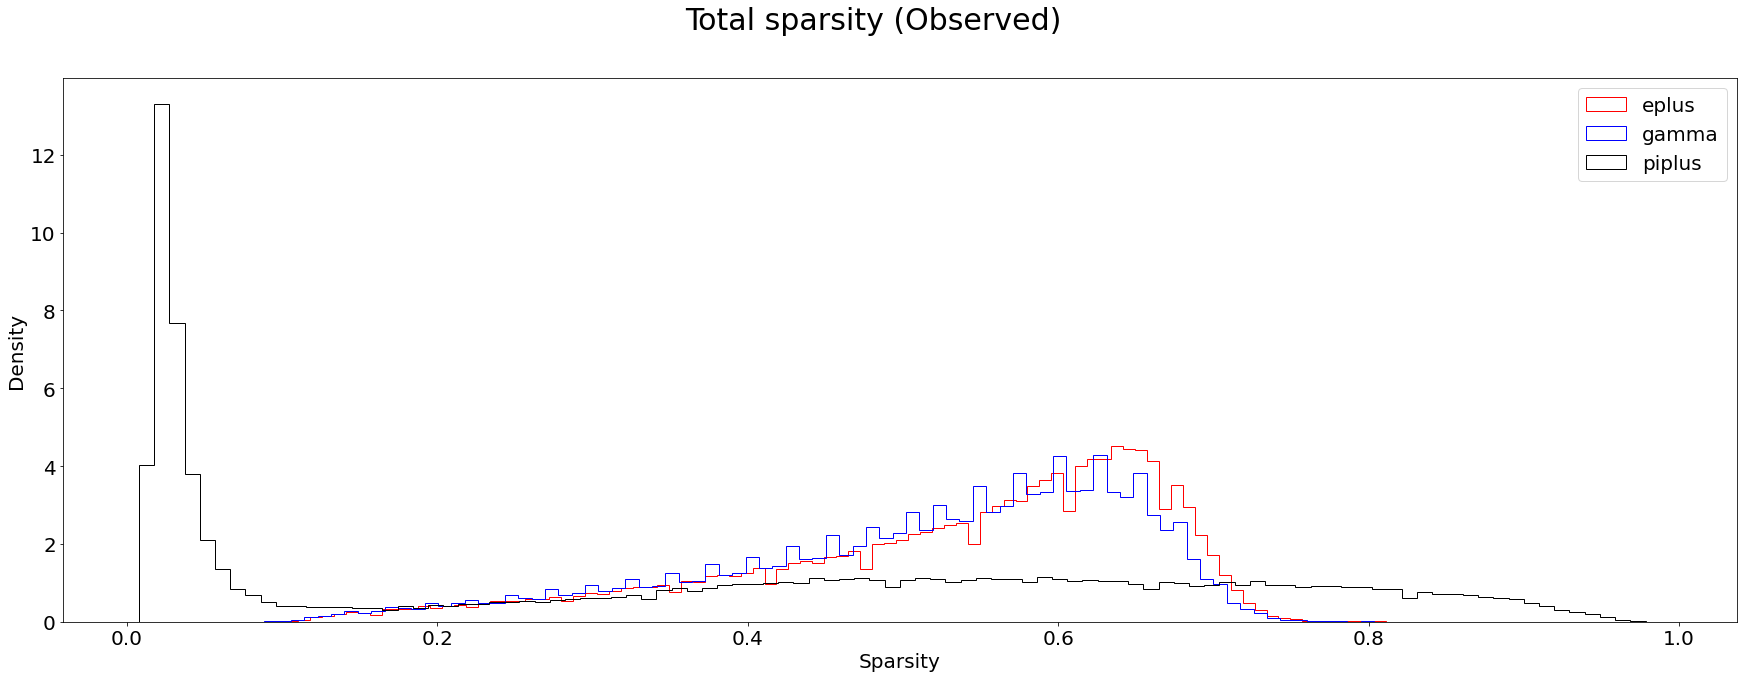

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

for j, hdf in enumerate(hdfs):
    sparsity = np.array(sparsitytot[hdf.filename])
    vals, bins,_ = ax.hist(sparsity, bins=100, histtype='step', density=True, color=colors[j], label=ptypes[j])

    ax.tick_params(labelsize=20)
    ax.set_xlabel('Sparsity', fontsize=20)
    ax.set_ylabel('Density', fontsize=20)

    ax.legend(loc="upper right", prop={"size":20})
        
fig.suptitle('Total sparsity (Observed)', fontsize=30)